# Time Series Plot
                                                                                                            BY GULSHAN GEDAM

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 440

In [29]:
df = pd.read_csv('daily-temperature.csv')
df

Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]

In [30]:
df.info()
# -->Here Date column is of Object type, we have to change it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [31]:
df = pd.read_csv('daily-temperature.csv', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [32]:
df['Date'] = pd.to_datetime(df['Date']) #---> To change the dat format

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [34]:
df.set_index('Date', inplace = True)

In [35]:
df.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

## Line and Scatter Plot

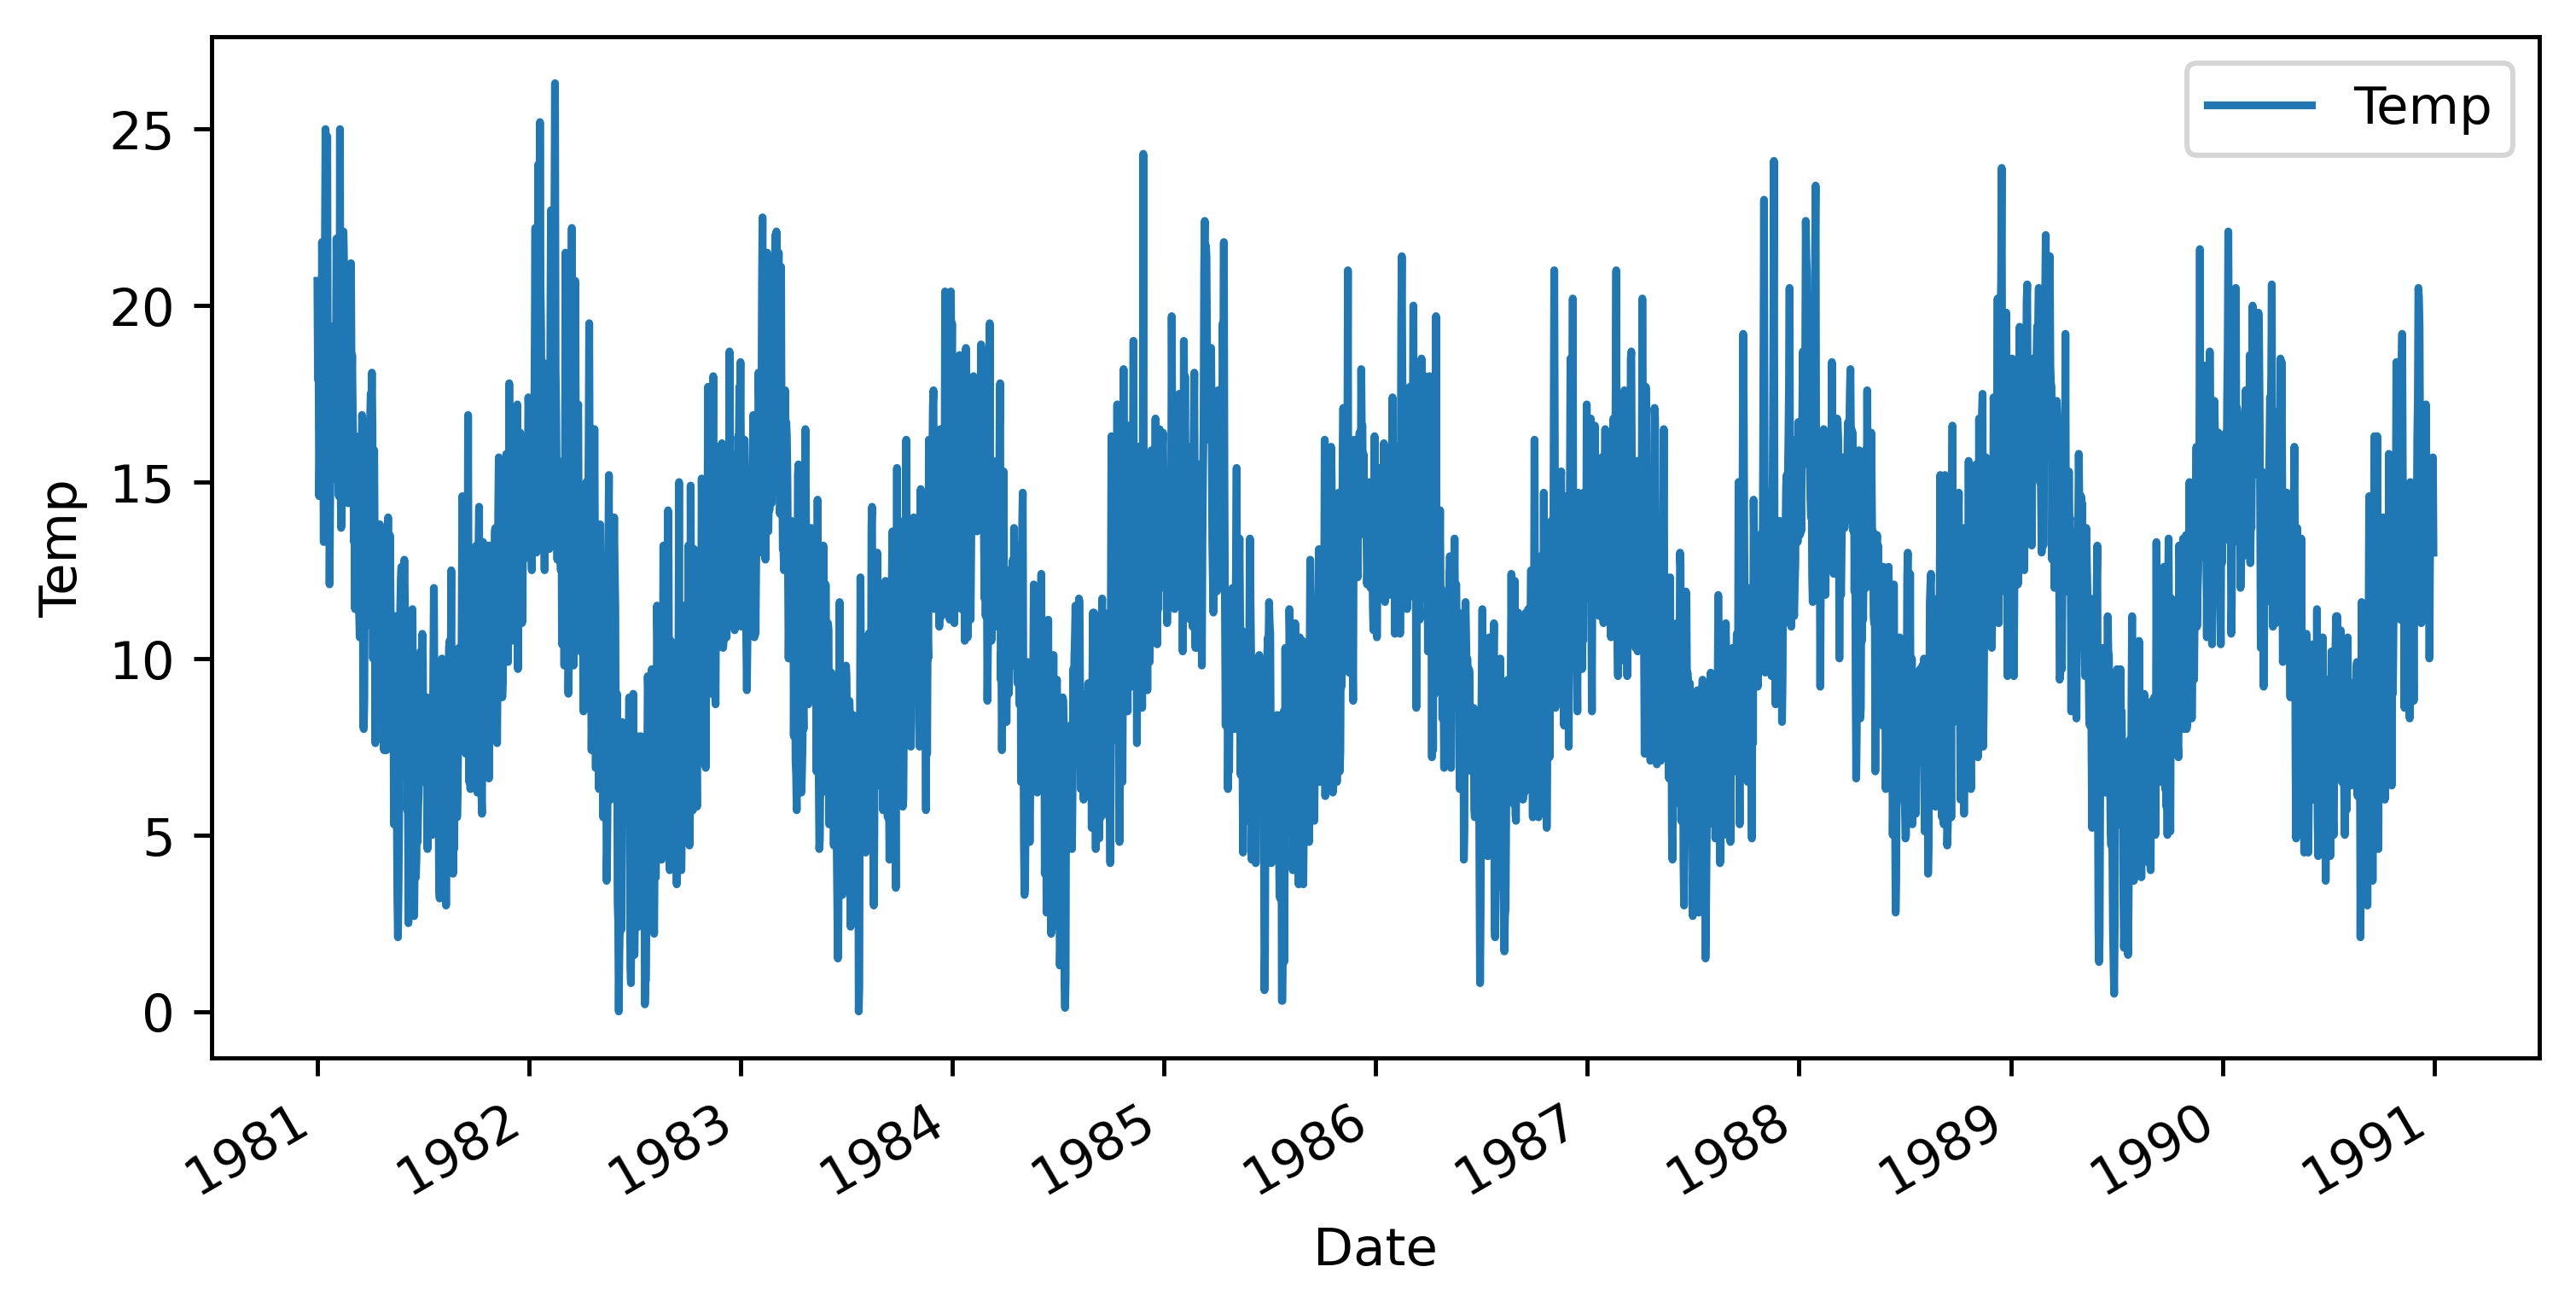

In [36]:
df.plot()
plt.ylabel('Temp')
plt.savefig('timeseries1.jpg')

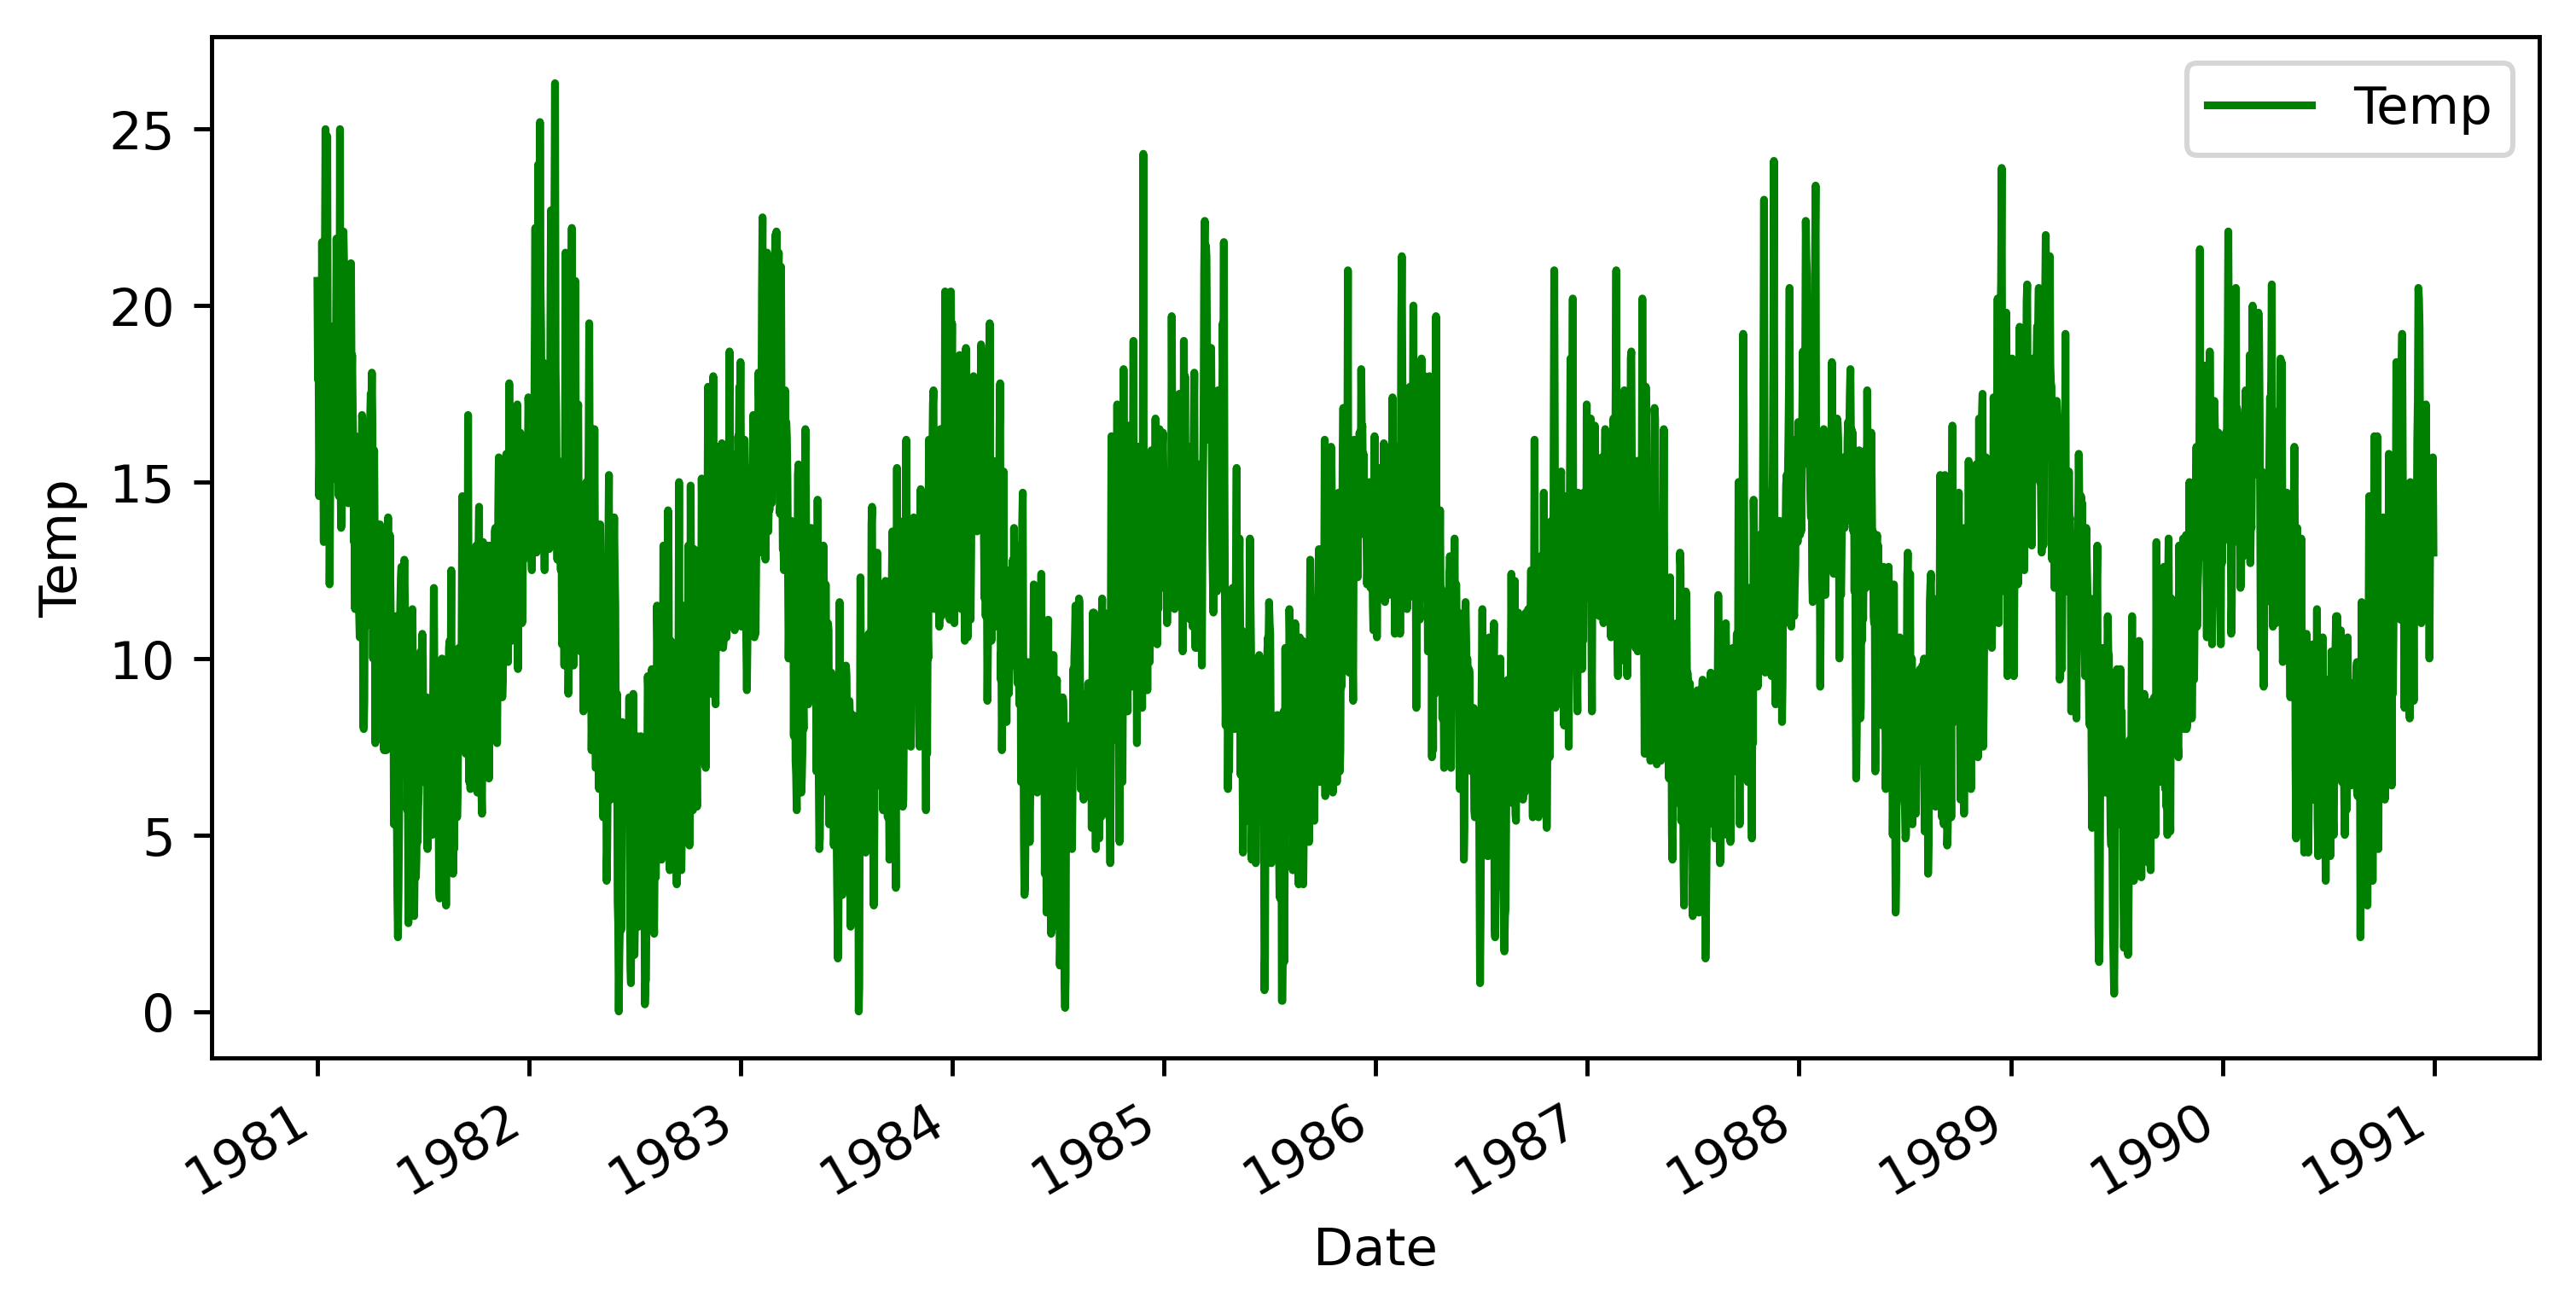

In [37]:
df.plot(color = 'g')
plt.ylabel('Temp')
plt.show()

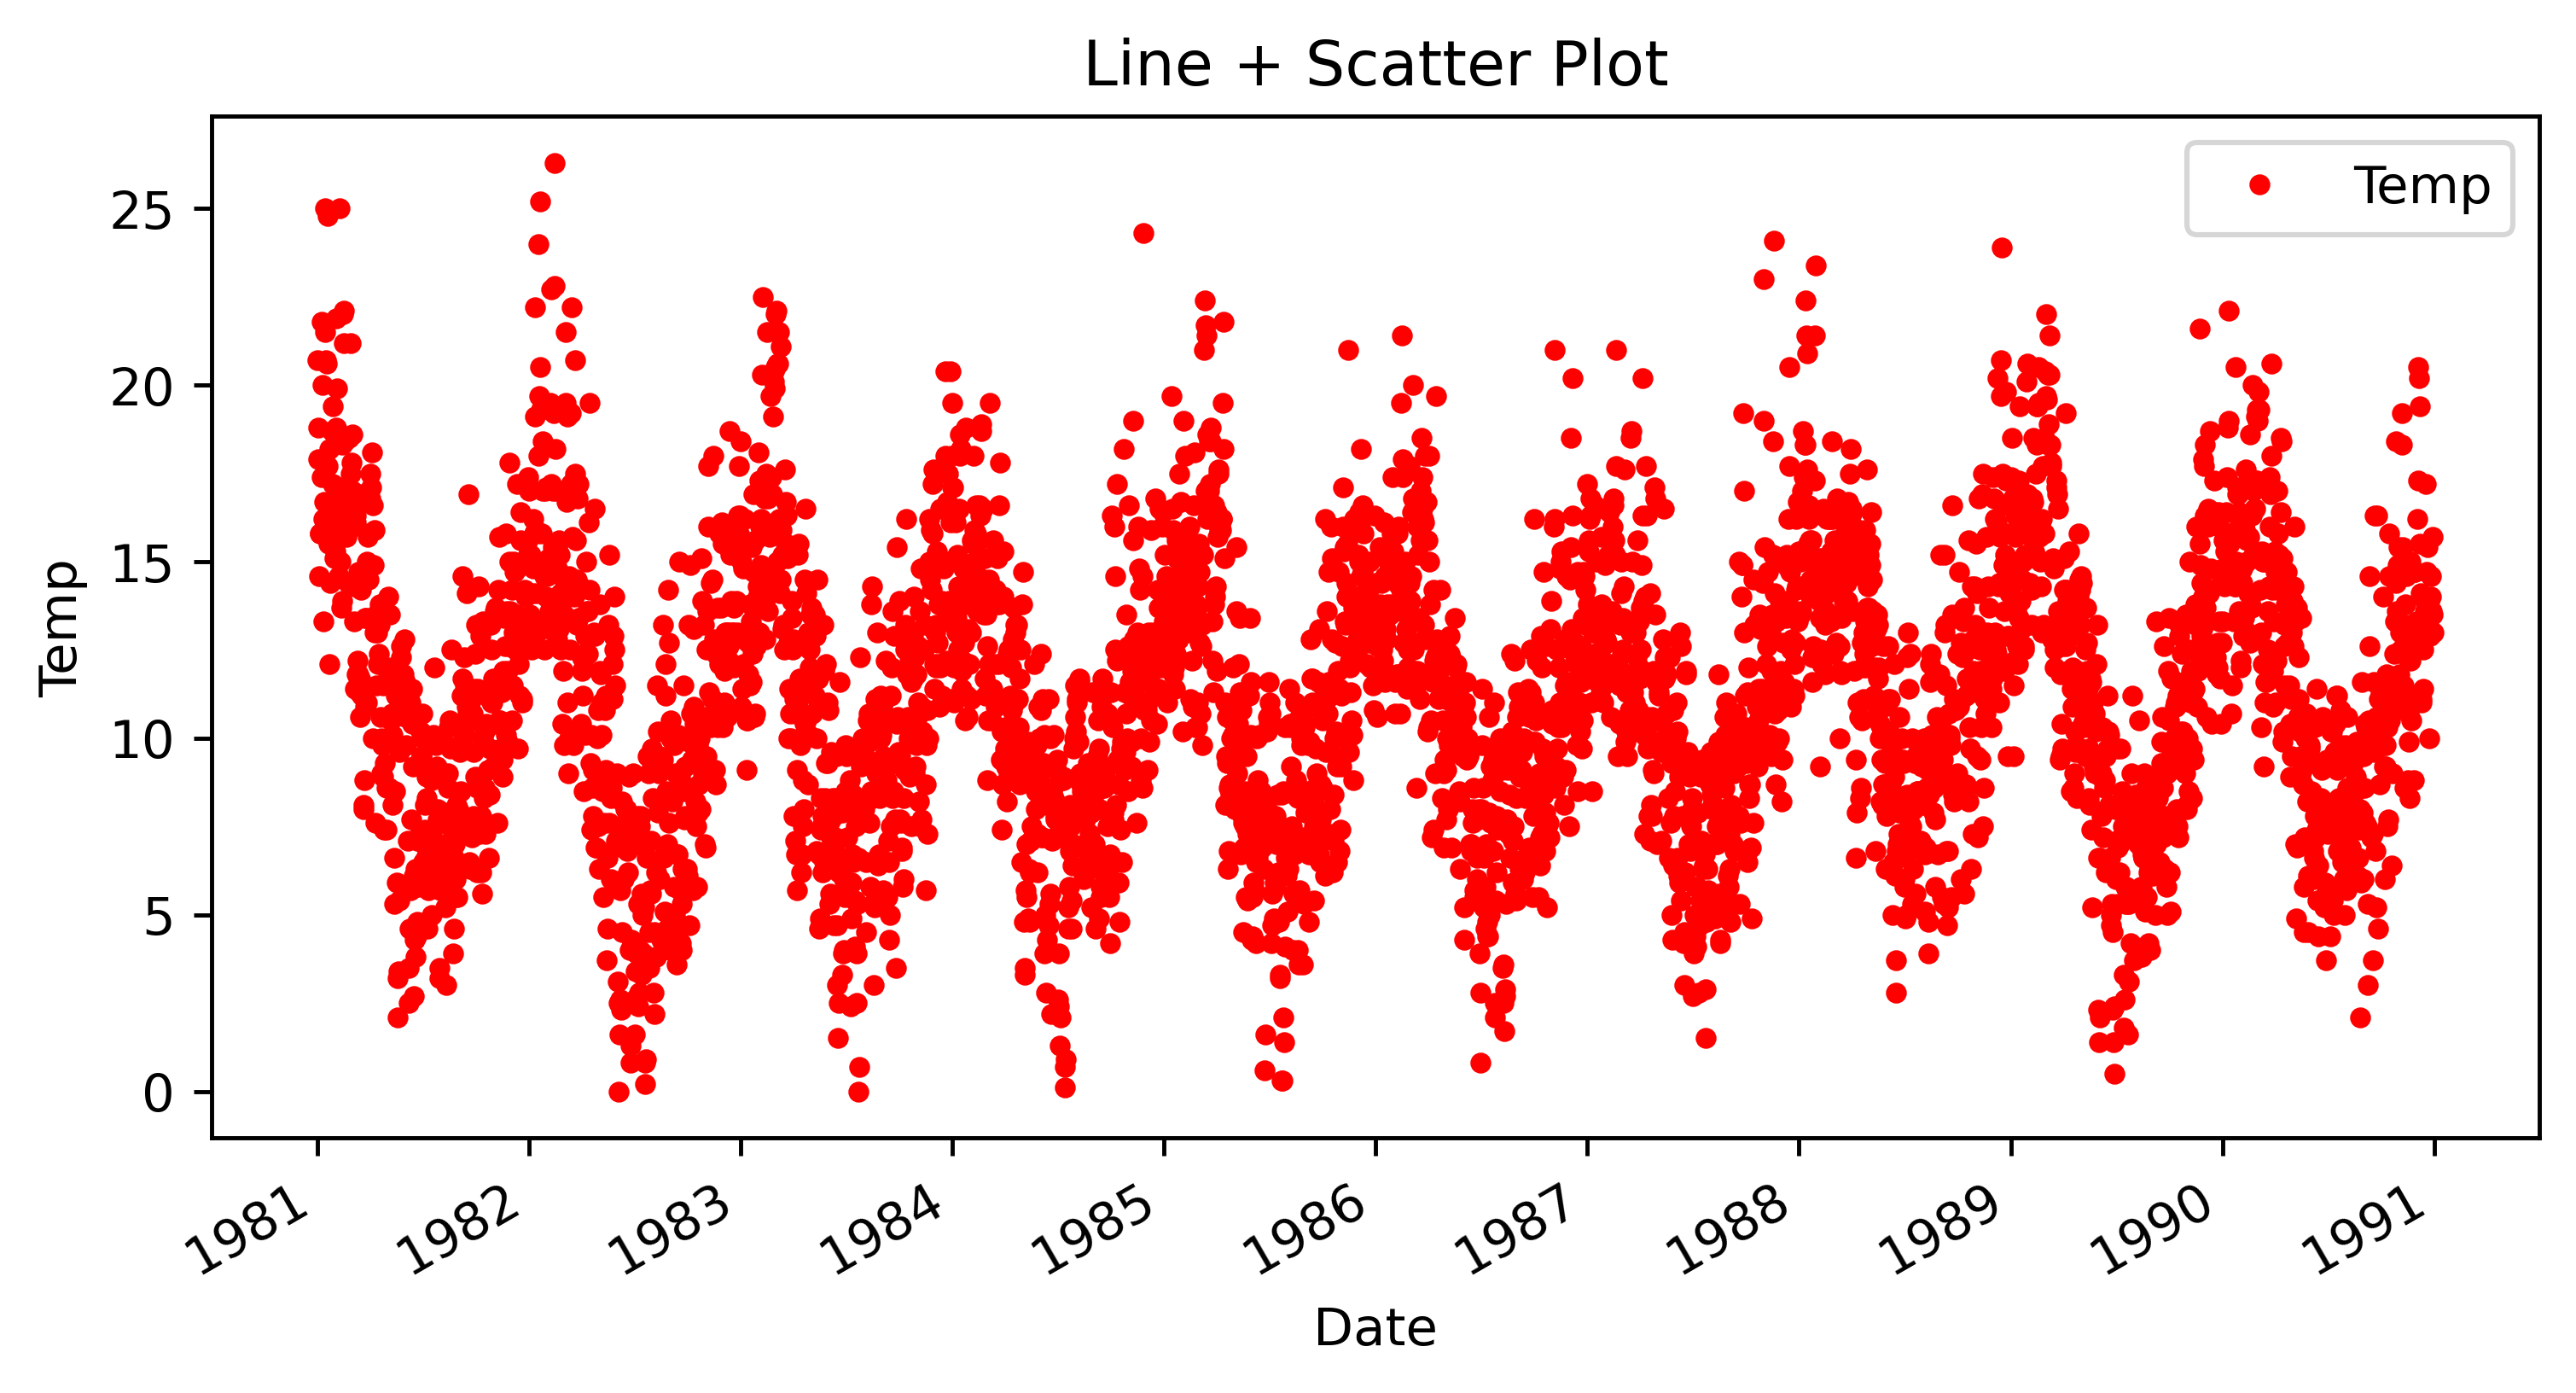

In [38]:
df.plot(style = '.', color = 'r')
plt.ylabel('Temp')
plt.title('Line + Scatter Plot')
plt.savefig('timeseries1.jpg')
plt.show()

## Subplots 

In [39]:
group = df.groupby(pd.Grouper(freq = 'A')) #--> 'A' means group by year with keeping last date

In [40]:
group

In [41]:
keys = group.groups.keys()

In [42]:
keys

dict_keys([Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC')])

In [43]:
group.get_group('1981-12-31') #--> This gives data of that perticular group(Data)

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1981-12-27  15.5
1981-12-28  13.3
1981-12-29  15.6
1981-12-30  15.2
1981-12-31  17.4

[365 rows x 1 columns]

In [44]:
for i in keys:
    print(i)

1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00


In [46]:
i #--> This Gives last Year in the series

Timestamp('1990-12-31 00:00:00', freq='A-DEC')

In [47]:
group.get_group(i)

Temp
Date            
1990-01-01  14.8
1990-01-02  13.3
1990-01-03  15.6
1990-01-04  14.5
1990-01-05  14.3
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[365 rows x 1 columns]

In [48]:
group.get_group(i)['Temp']

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 365, dtype: float64

In [49]:
group.get_group(i)['Temp'].values #--> This Gives array of temp.

array([14.8, 13.3, 15.6, 14.5, 14.3, 15.3, 16.4, 14.8, 17.4, 18.8, 22.1,
       19. , 15.5, 15.8, 14.7, 10.7, 11.5, 15. , 14.5, 14.5, 13.3, 14.3,
       14.3, 20.5, 15. , 17.1, 16.9, 16.9, 13.6, 16.4, 16.1, 12. , 12.2,
       14.8, 14.8, 14.4, 12.9, 13.4, 15.9, 16.1, 17.6, 15.6, 15. , 13. ,
       14.1, 17.3, 15.7, 18.6, 12.7, 14. , 13.7, 16.3, 20. , 17. , 15.2,
       16.5, 16.5, 17.3, 19.1, 19.3, 17.3, 19. , 19.8, 19.3, 17.2, 14.2,
       10.3, 13. , 15.3, 15. , 12.1,  9.2, 11. , 15. , 11.6, 11.6, 15.1,
       15. , 13.6, 12.5, 14.3, 16. , 17.4, 16.9, 18. , 20.6, 14.2, 10.9,
       11.9, 13.3, 15.3, 14.7, 11. , 12.2, 14.2, 17. , 15.8, 15.2, 15.1,
       14.7, 18.5, 16.4, 18.4, 15.1,  9.9, 10.2, 12.6, 13.2, 11.5, 13.8,
       14.5, 14.7, 11.2, 12.7, 13.7, 11.5, 10.4,  8.9, 11.1,  9.5, 13. ,
       13.9, 12.6, 14.3, 16. , 13.3,  7. ,  4.9,  6.9, 13.7, 10.6, 12.3,
       11.1, 10.2,  9.5,  8.9, 13.4,  9.1,  9.4,  8.7,  5.8,  4.5,  7.2,
       10. , 10.5, 10.7,  8.2,  6.1,  4.5,  6.1,  9

In [50]:
years = pd.DataFrame()
for key in keys:
    years[key] = group.get_group(i)['Temp'].values

In [52]:
years

1981-12-31  1982-12-31  1983-12-31  1984-12-31  1985-12-31  1986-12-31  \
0          14.8        14.8        14.8        14.8        14.8        14.8   
1          13.3        13.3        13.3        13.3        13.3        13.3   
2          15.6        15.6        15.6        15.6        15.6        15.6   
3          14.5        14.5        14.5        14.5        14.5        14.5   
4          14.3        14.3        14.3        14.3        14.3        14.3   
..          ...         ...         ...         ...         ...         ...   
360        14.0        14.0        14.0        14.0        14.0        14.0   
361        13.6        13.6        13.6        13.6        13.6        13.6   
362        13.5        13.5        13.5        13.5        13.5        13.5   
363        15.7        15.7        15.7        15.7        15.7        15.7   
364        13.0        13.0        13.0        13.0        13.0        13.0   

     1987-12-31  1988-12-31  1989-12-31  1990-12-31  
0          14.8        14.8        14.8        14.8  
1          13.3        13.3        13.3        13.3  
2          15.6        15.6        15.6        15.6  
3          14.5        14.5        14.5        14.5  
4          14.3        14.3        14.3        14.3  
..          ...         ...         ...         ...  
360        14.0        14.0        14.0        14.0  
361        13.6        13.6        13.6        13.6  
362        13.5        13.5        13.5        13.5  
363        15.7        15.7        15.7        15.7  
364        13.0        13.0        13.0        13.0  

[365 rows x 10 columns]

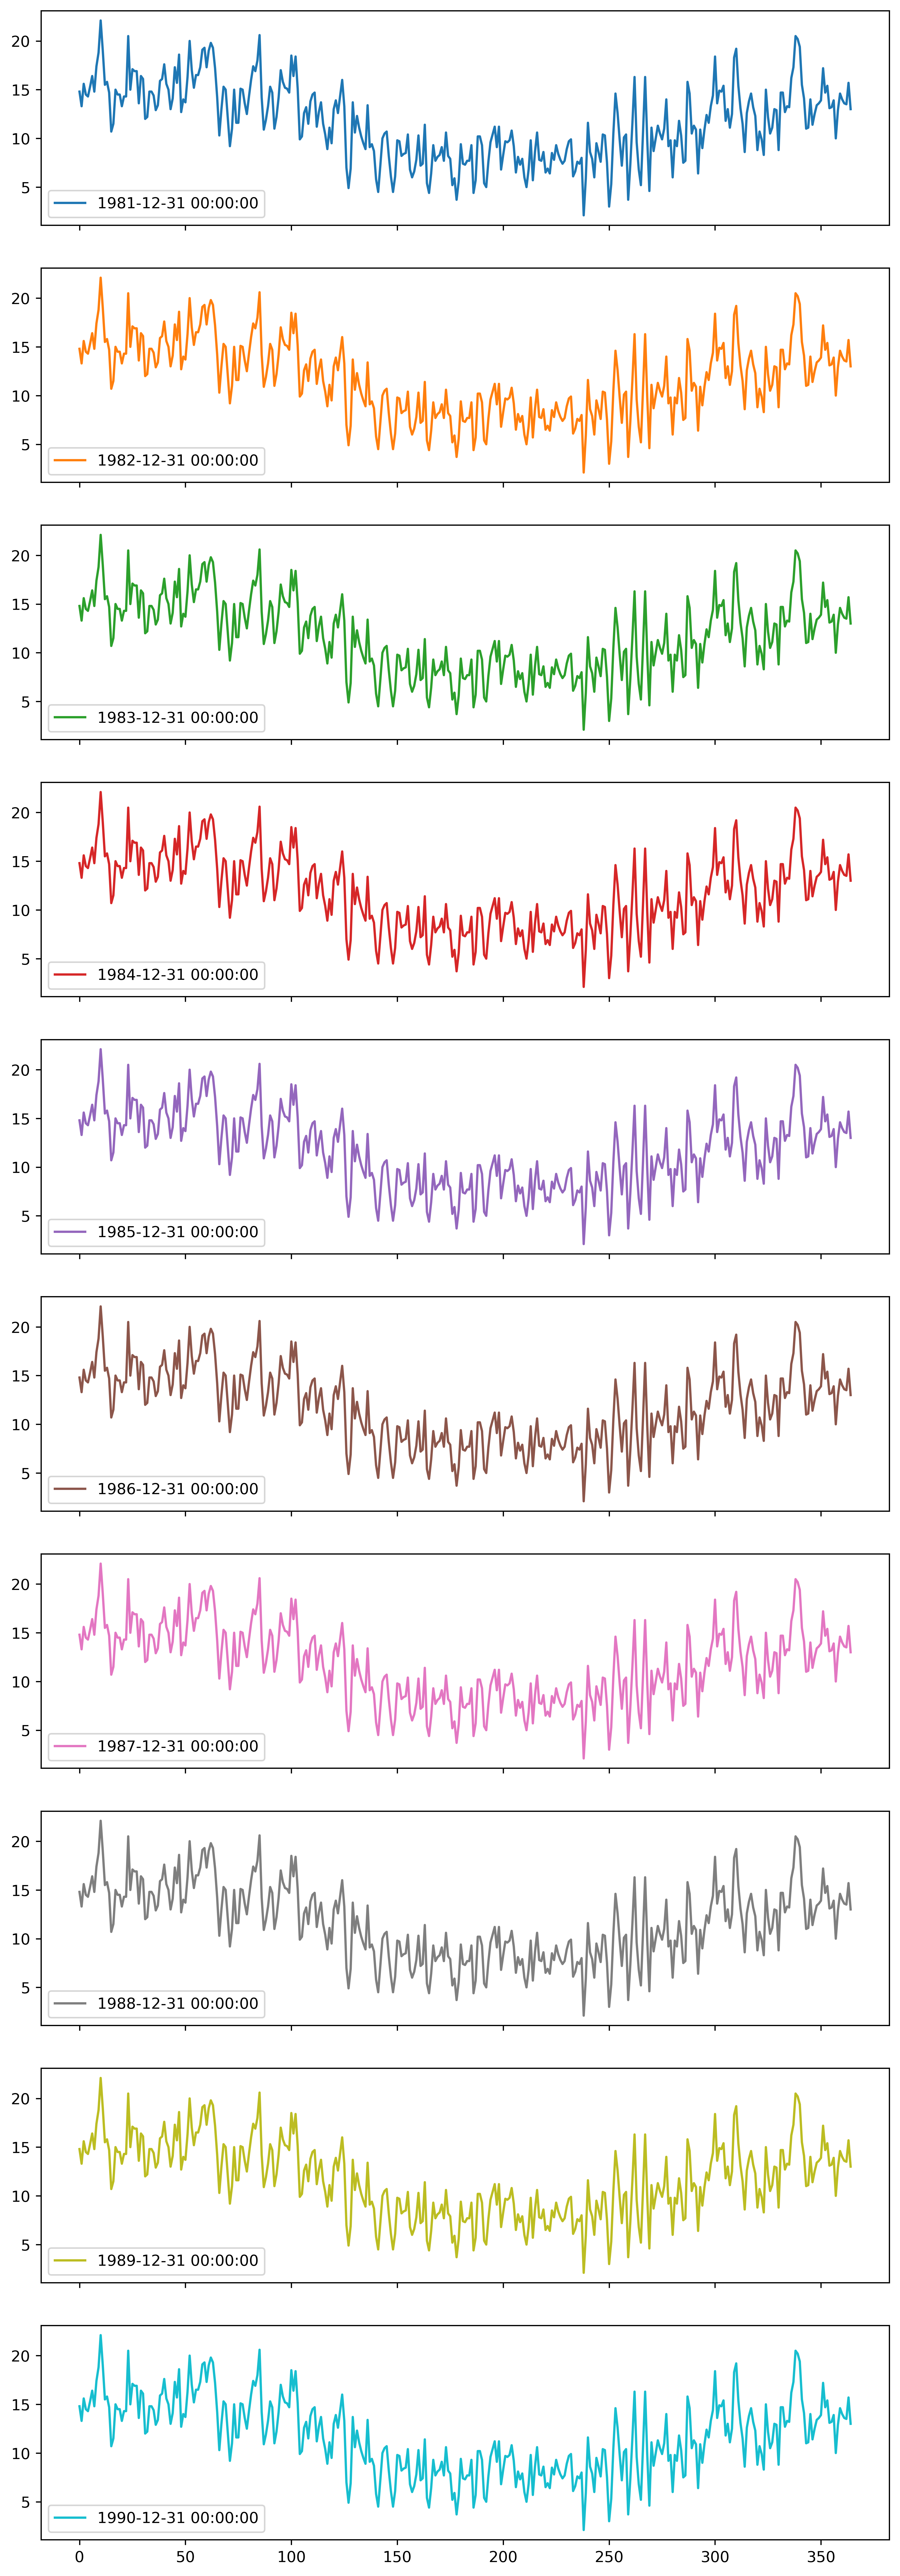

<Figure size 3520x1760 with 0 Axes>

In [53]:
years.plot(subplots = True, figsize = (10,30))
plt.show()
plt.tight_layout()
plt.savefig('timeseries2.jpg')

### Heatmap

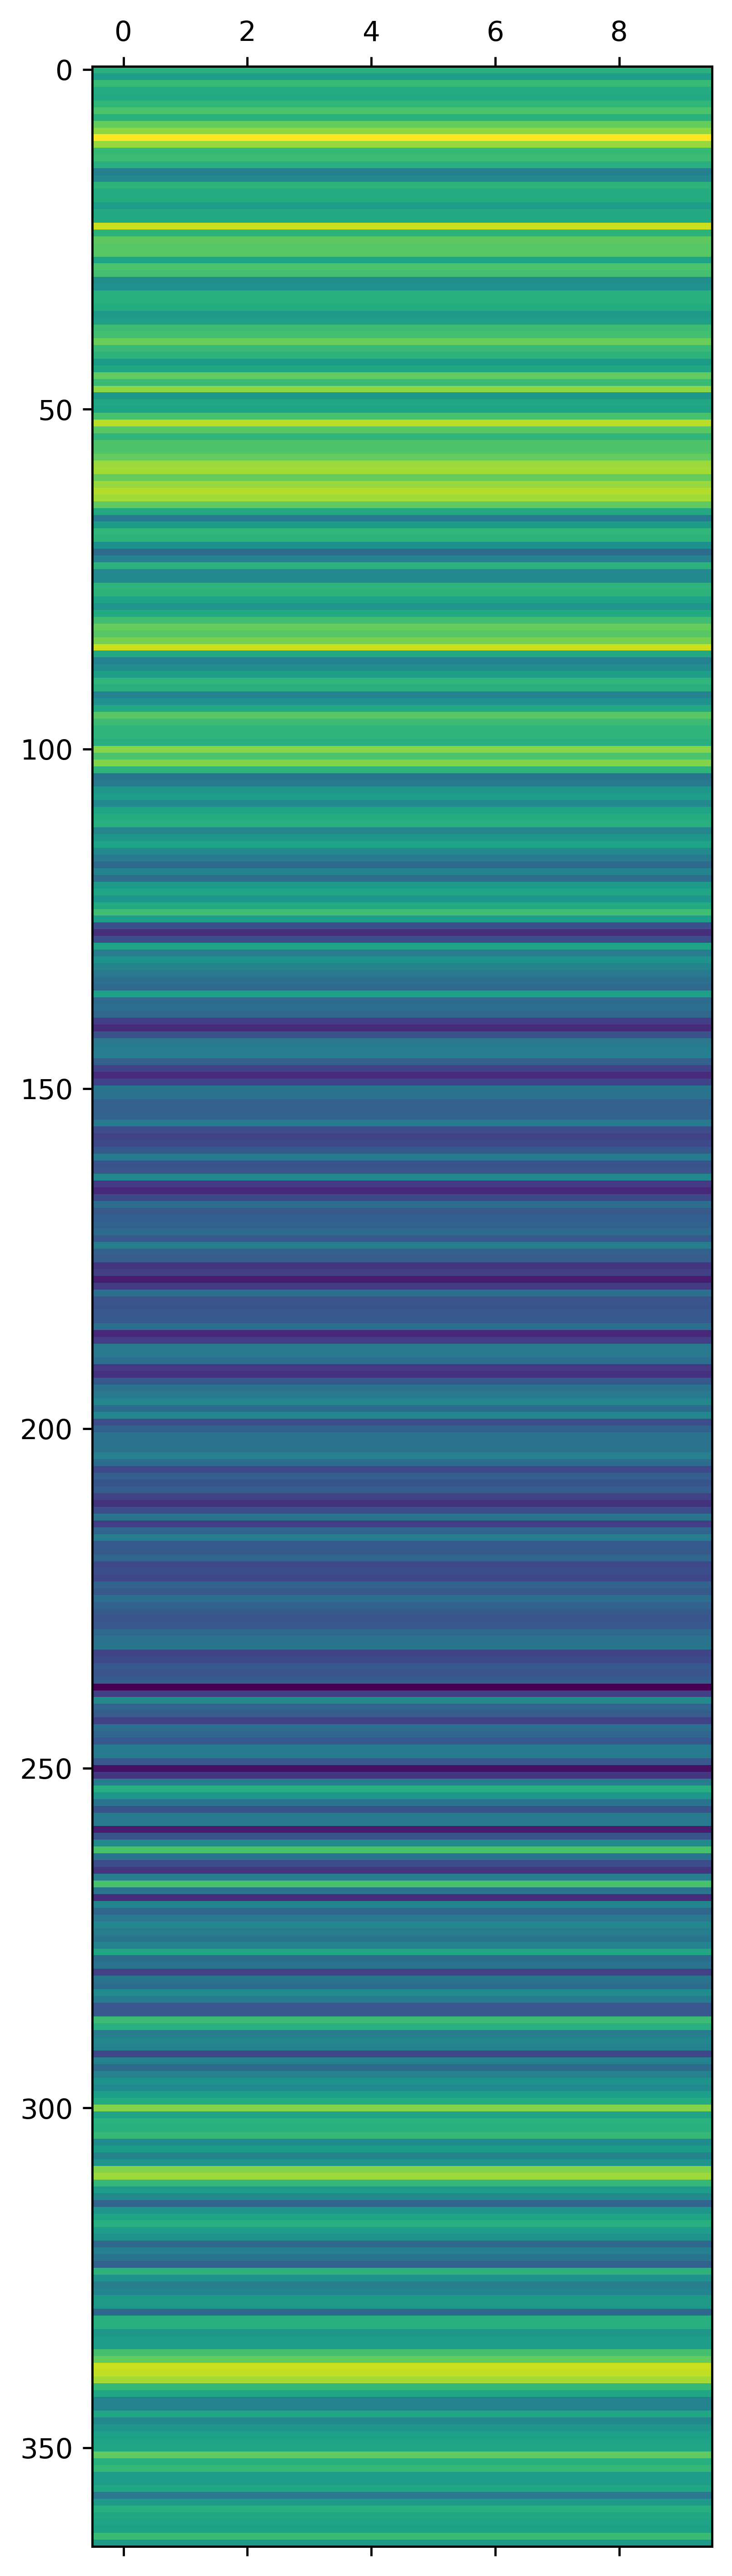

In [54]:
plt.matshow(years, aspect = 'auto')

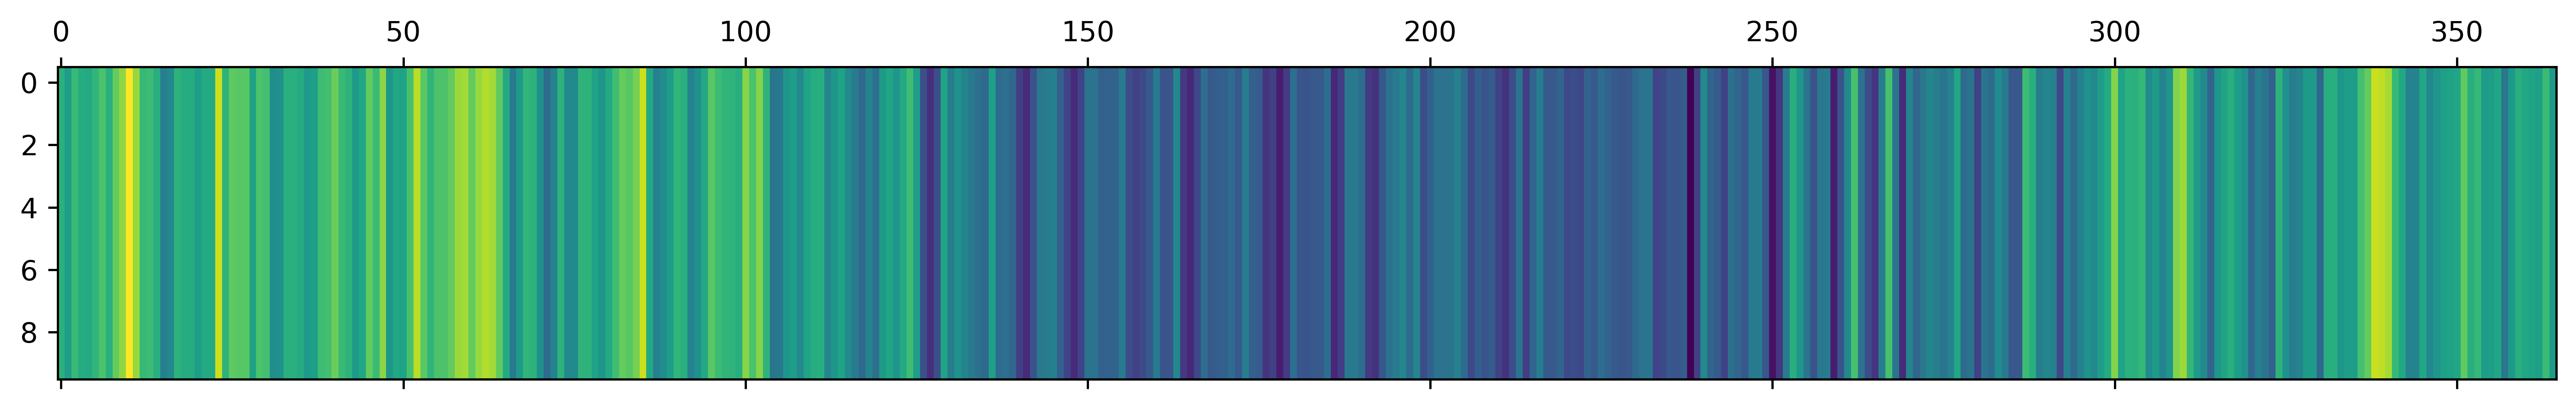

In [56]:
plt.matshow(years.T, aspect = 'auto')
plt.savefig('timeseries3.jpg')

In [57]:
df.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

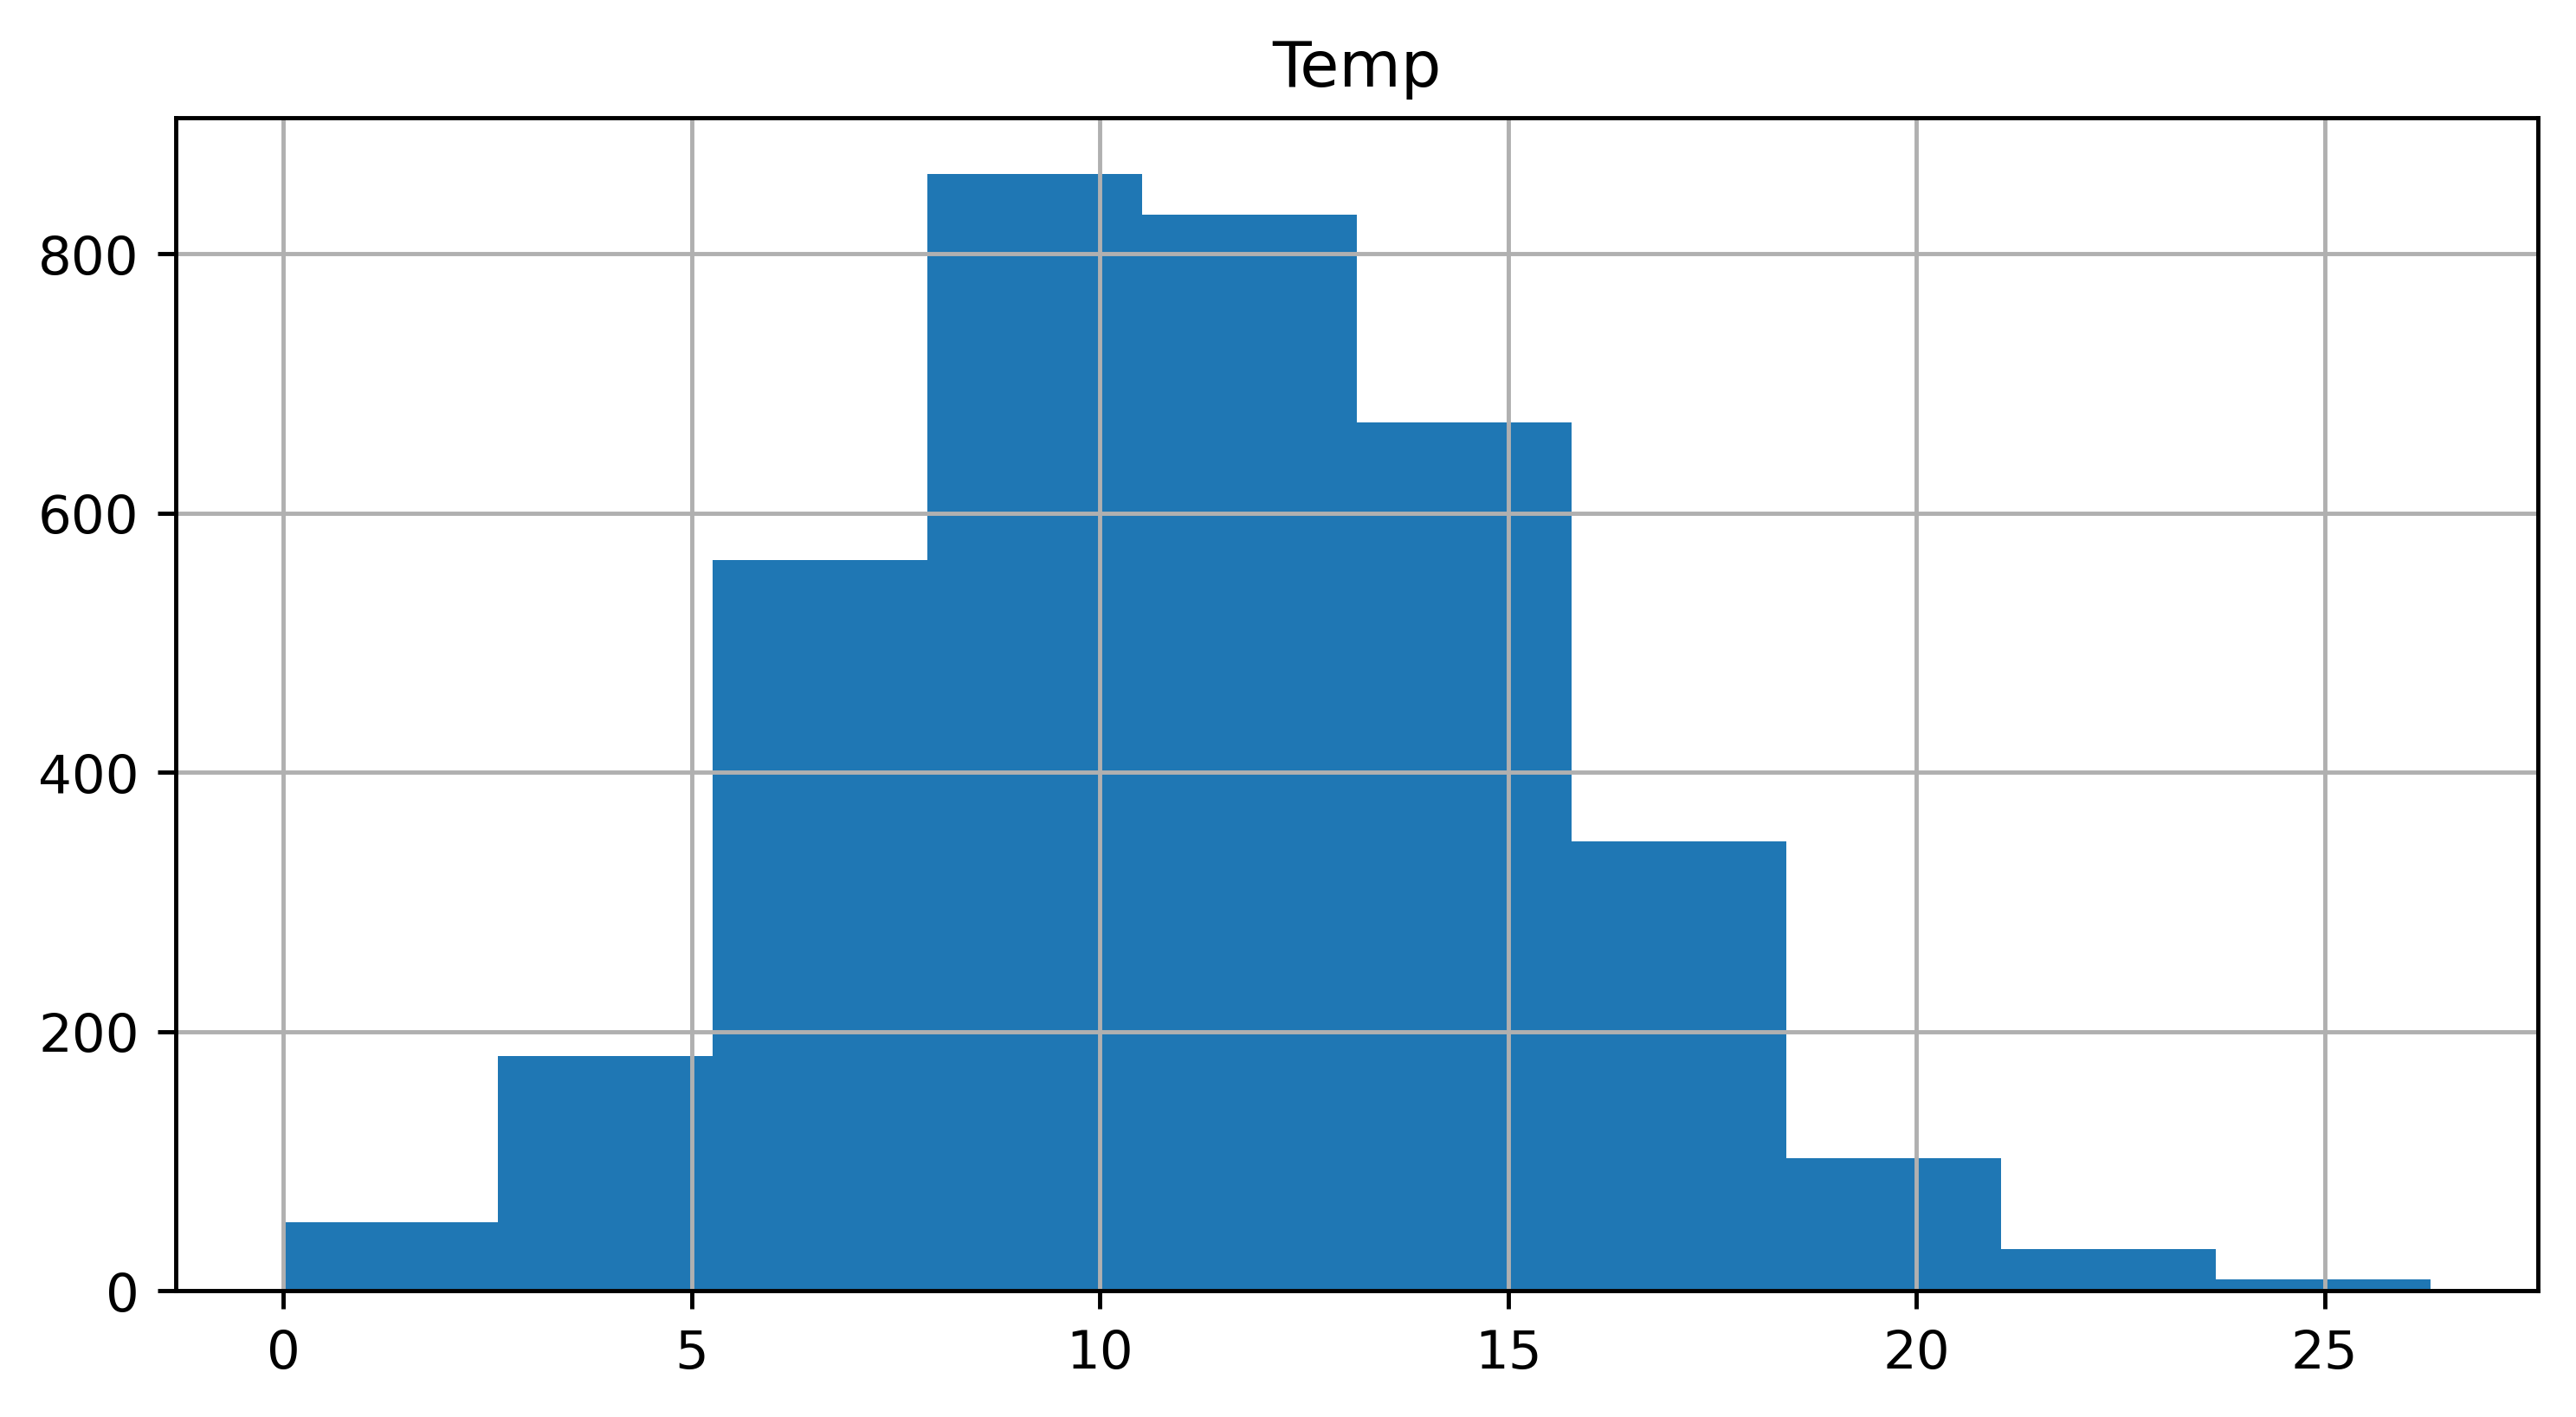

In [58]:
df.hist()
plt.show()

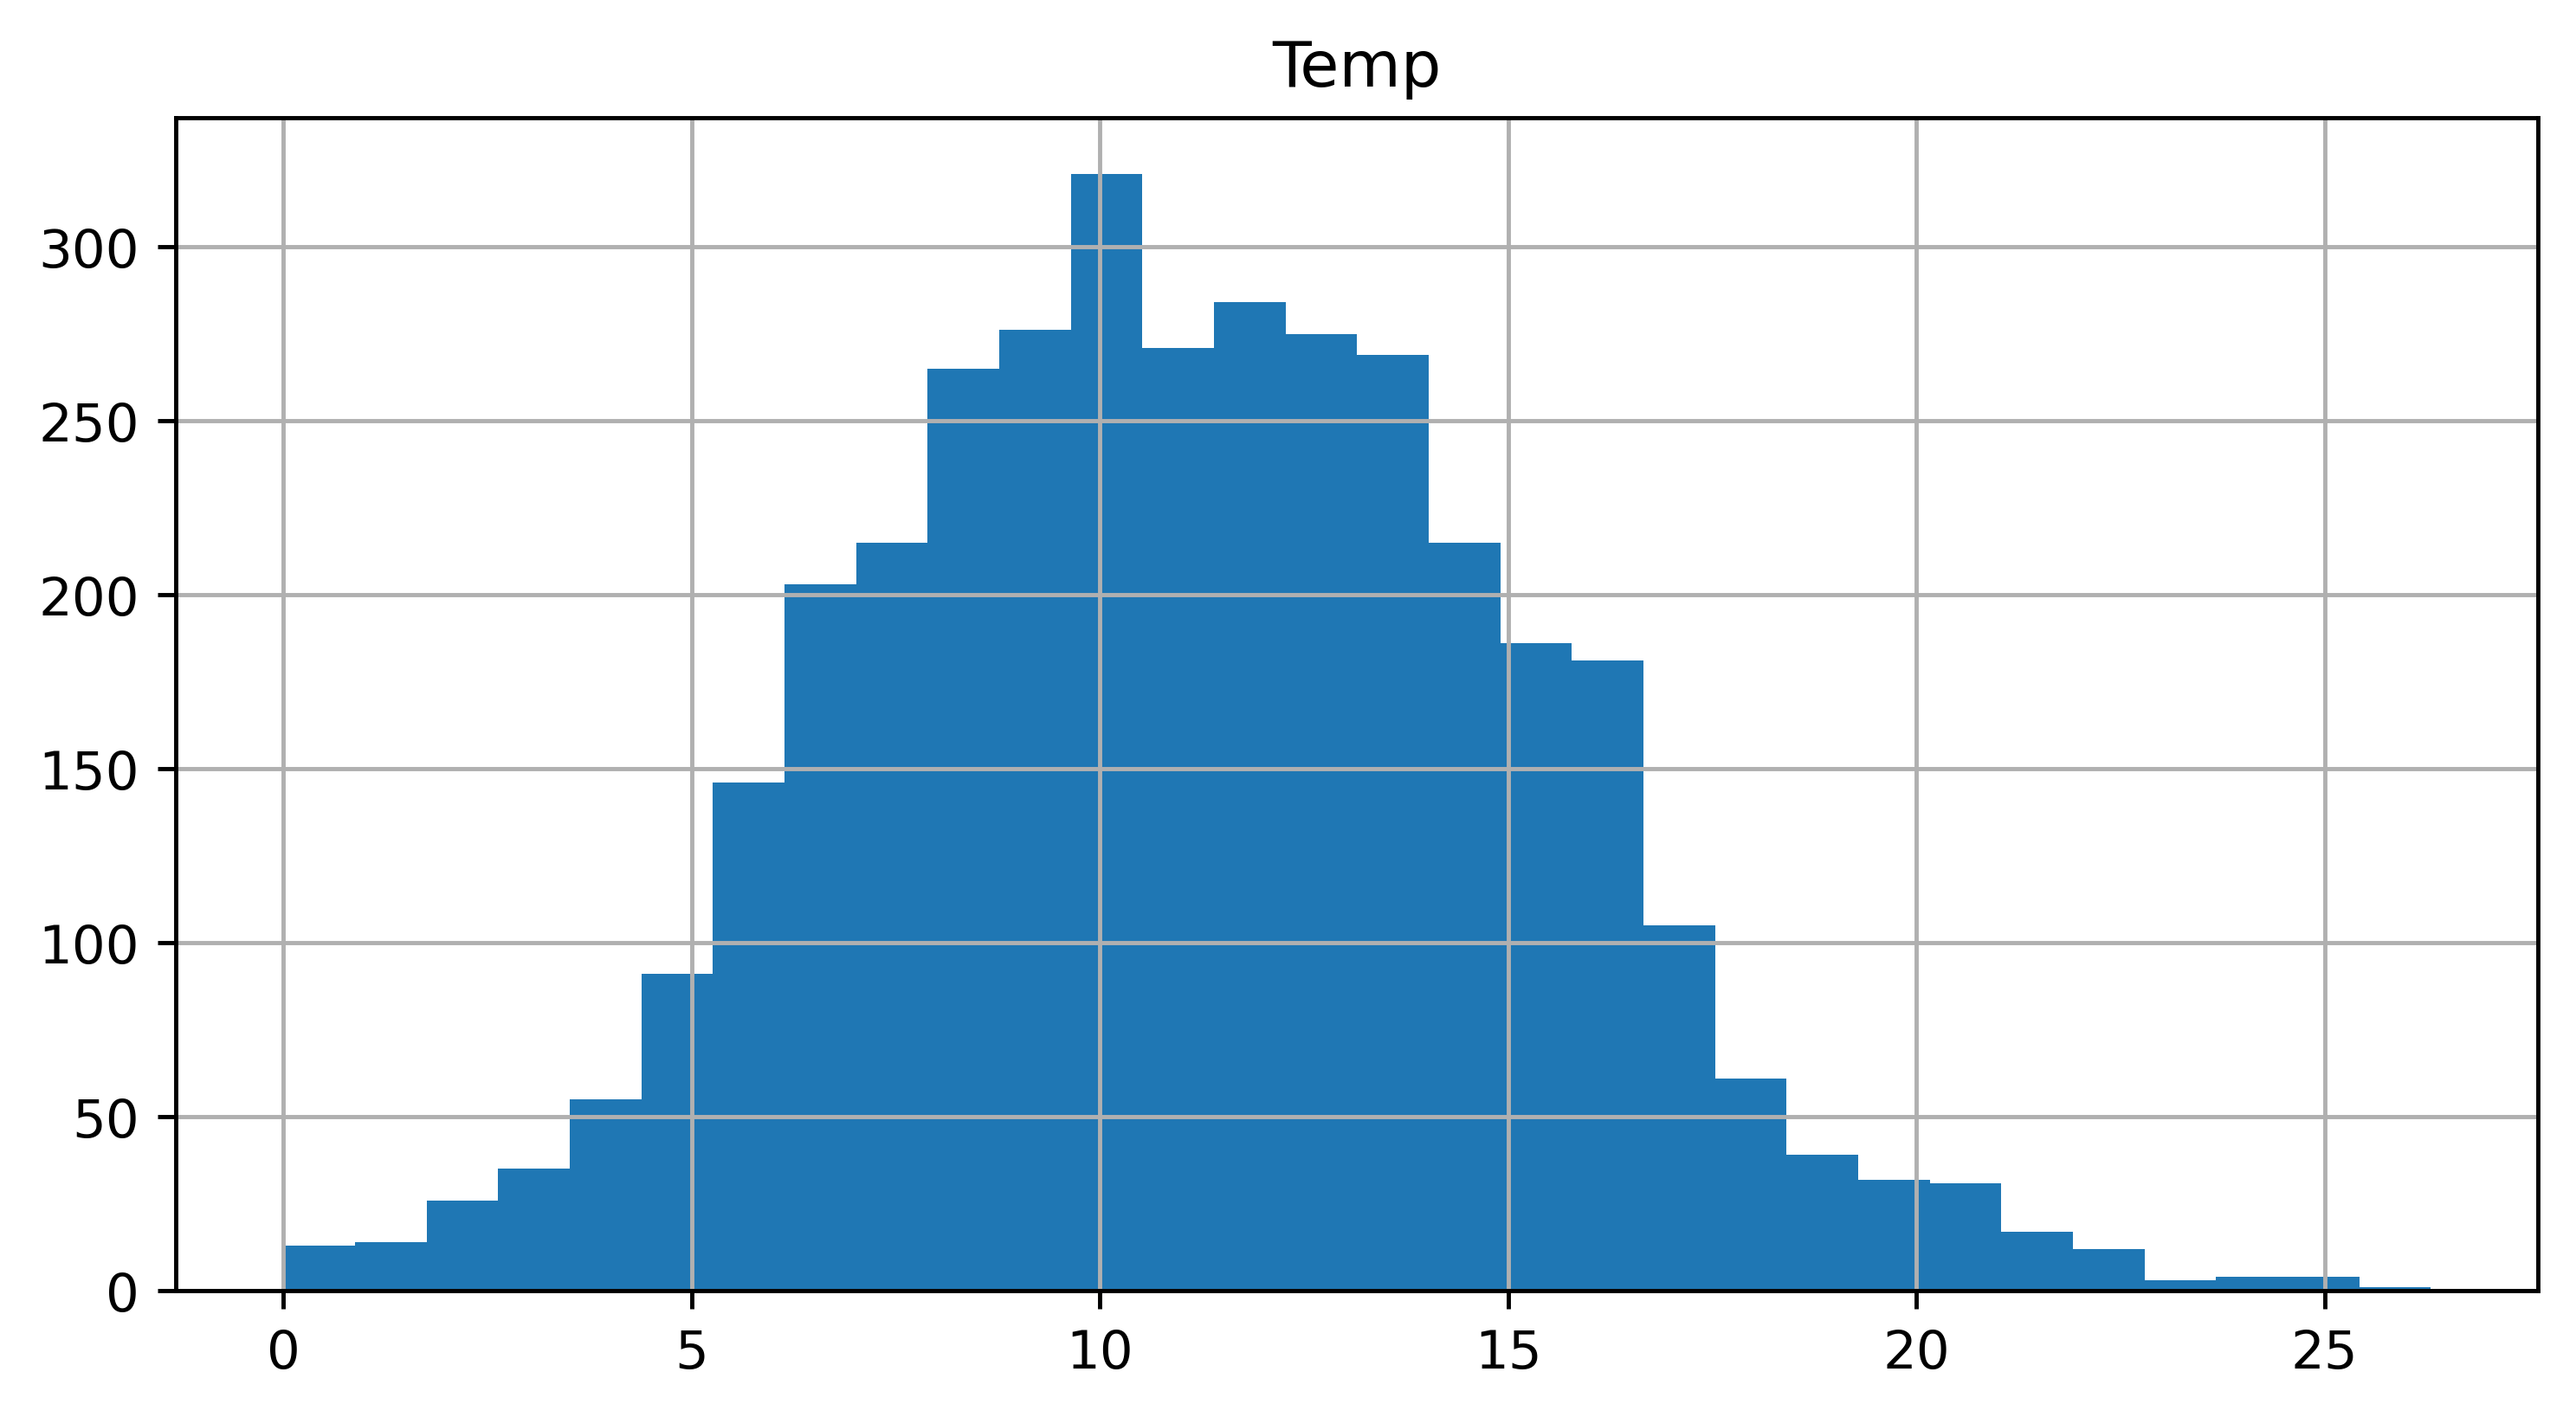

In [59]:
df.hist(bins = 30)
plt.show()

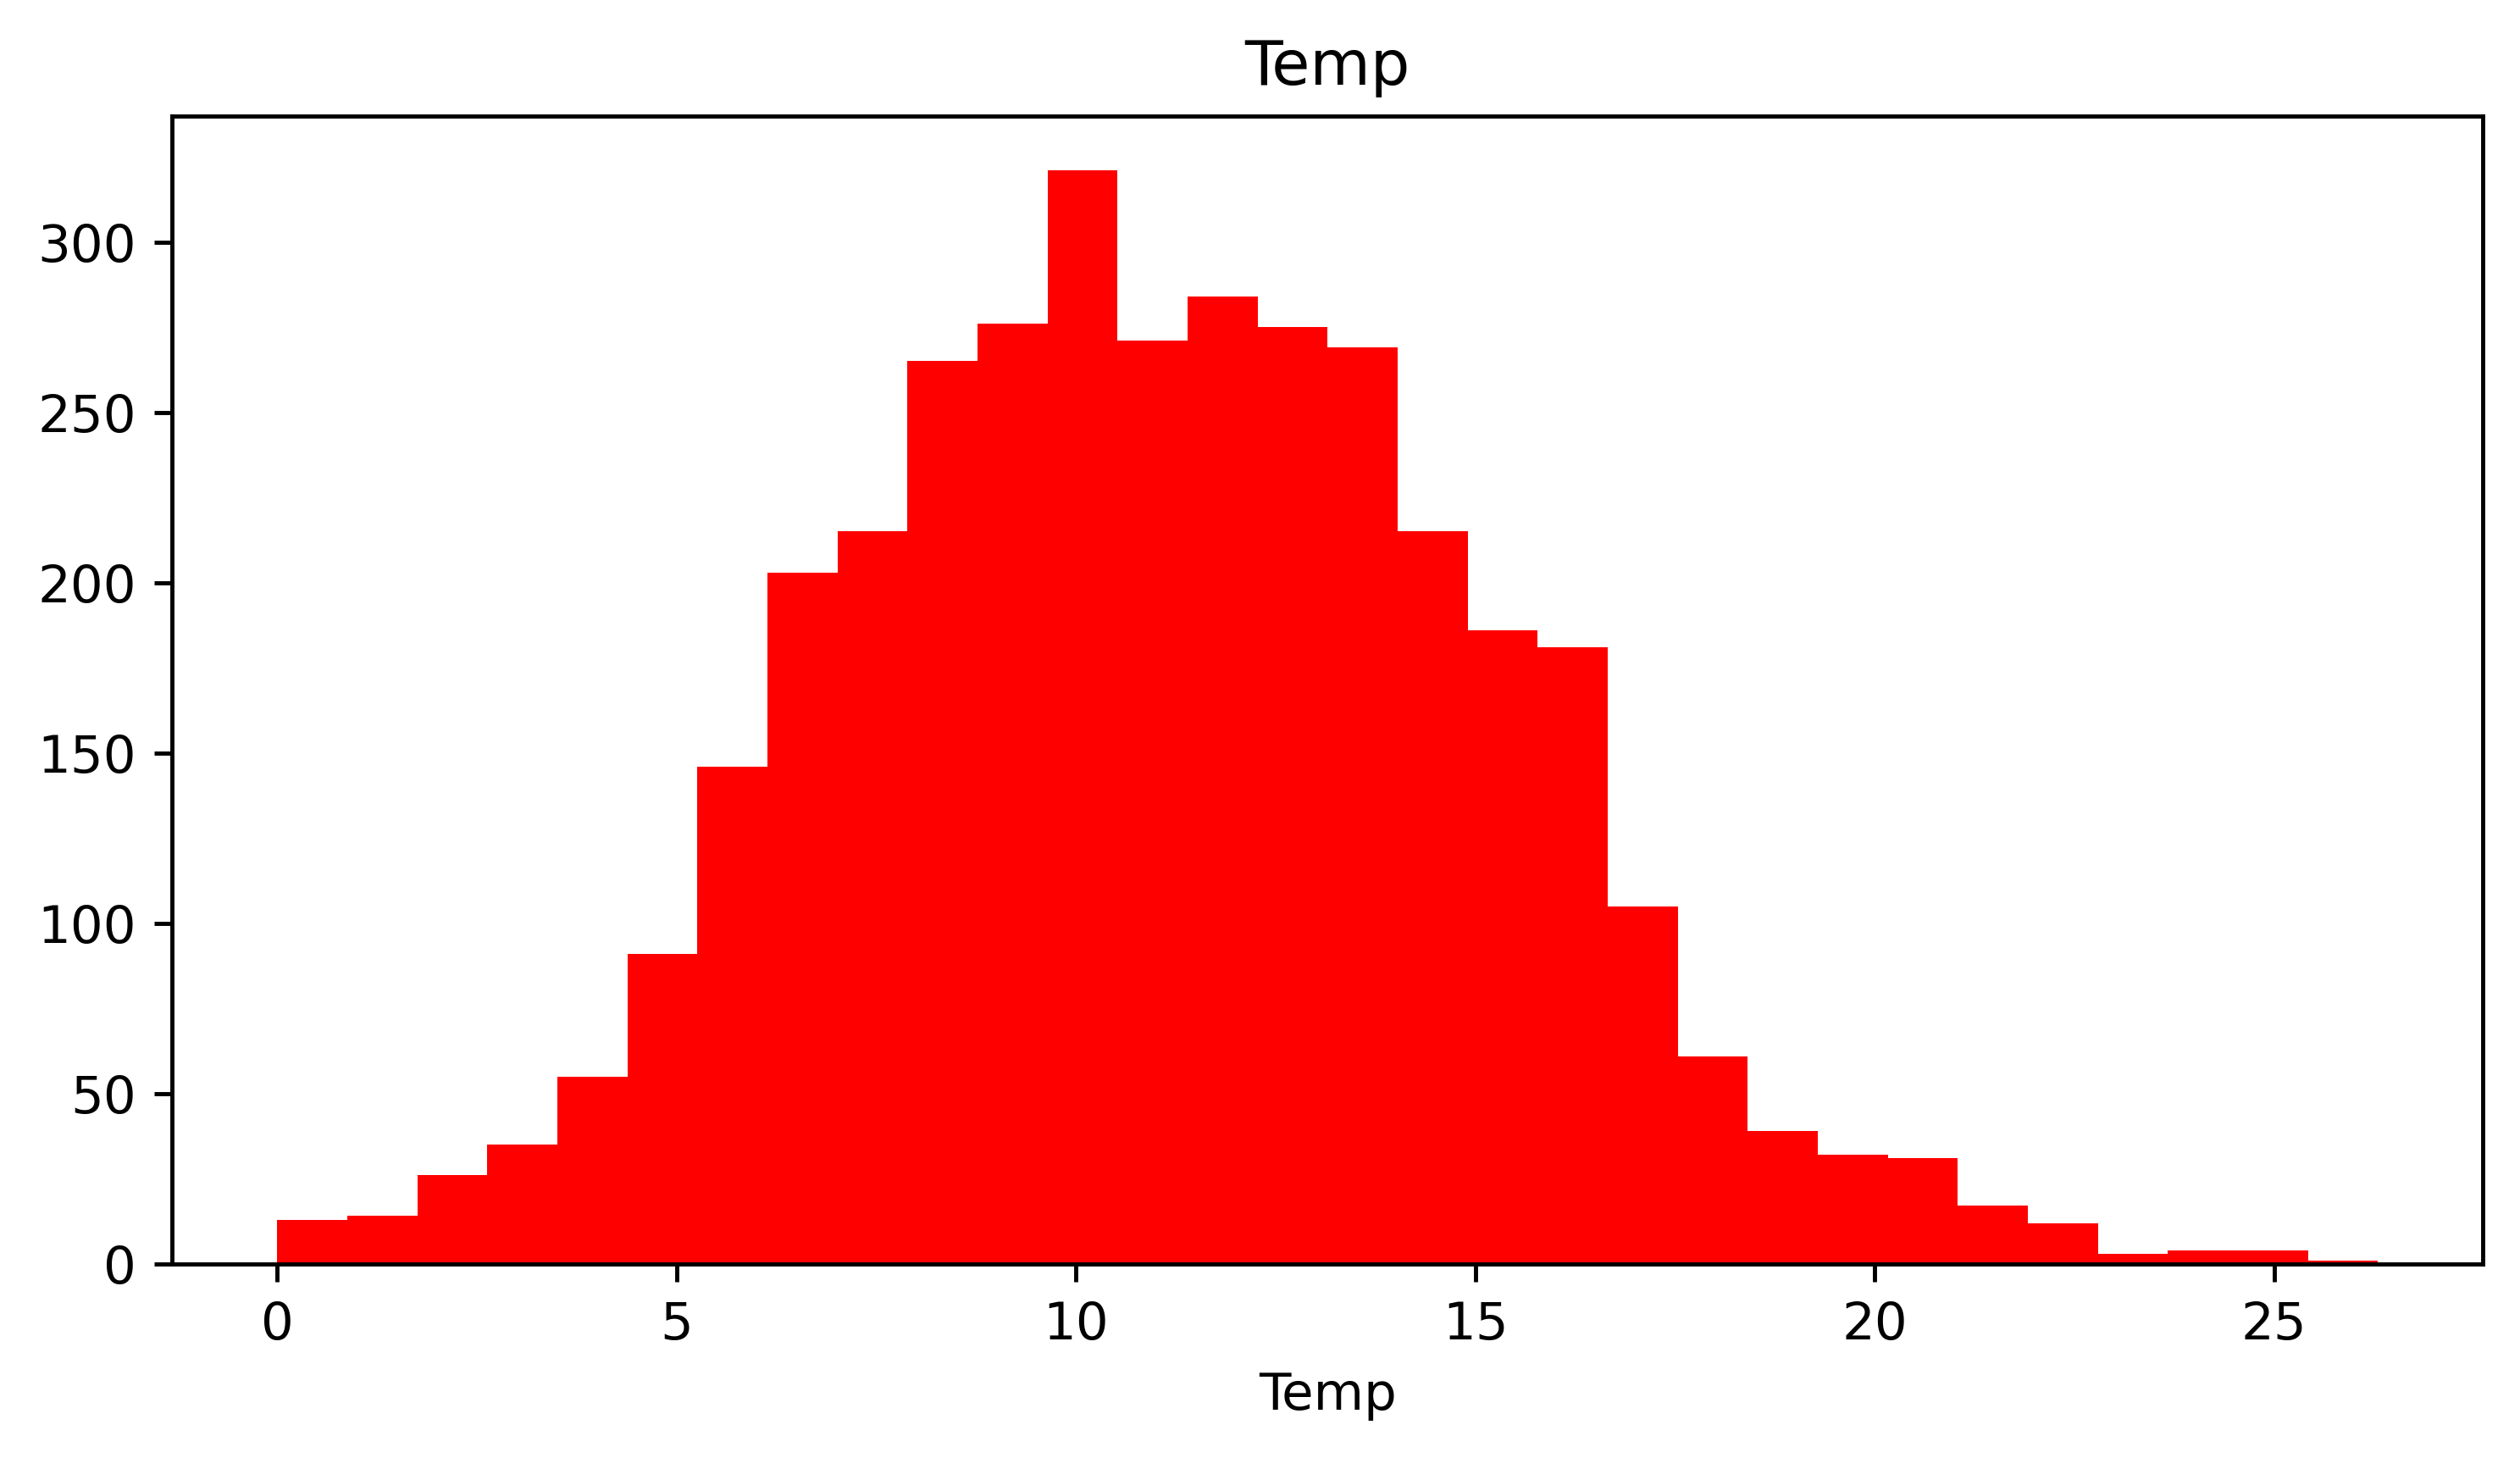

<Figure size 3520x1760 with 0 Axes>

In [64]:
df.hist(bins = 30, grid = False, color = 'r')
plt.xlabel('Temp')
plt.show()
plt.savefig('timeseries4_1.jpg')

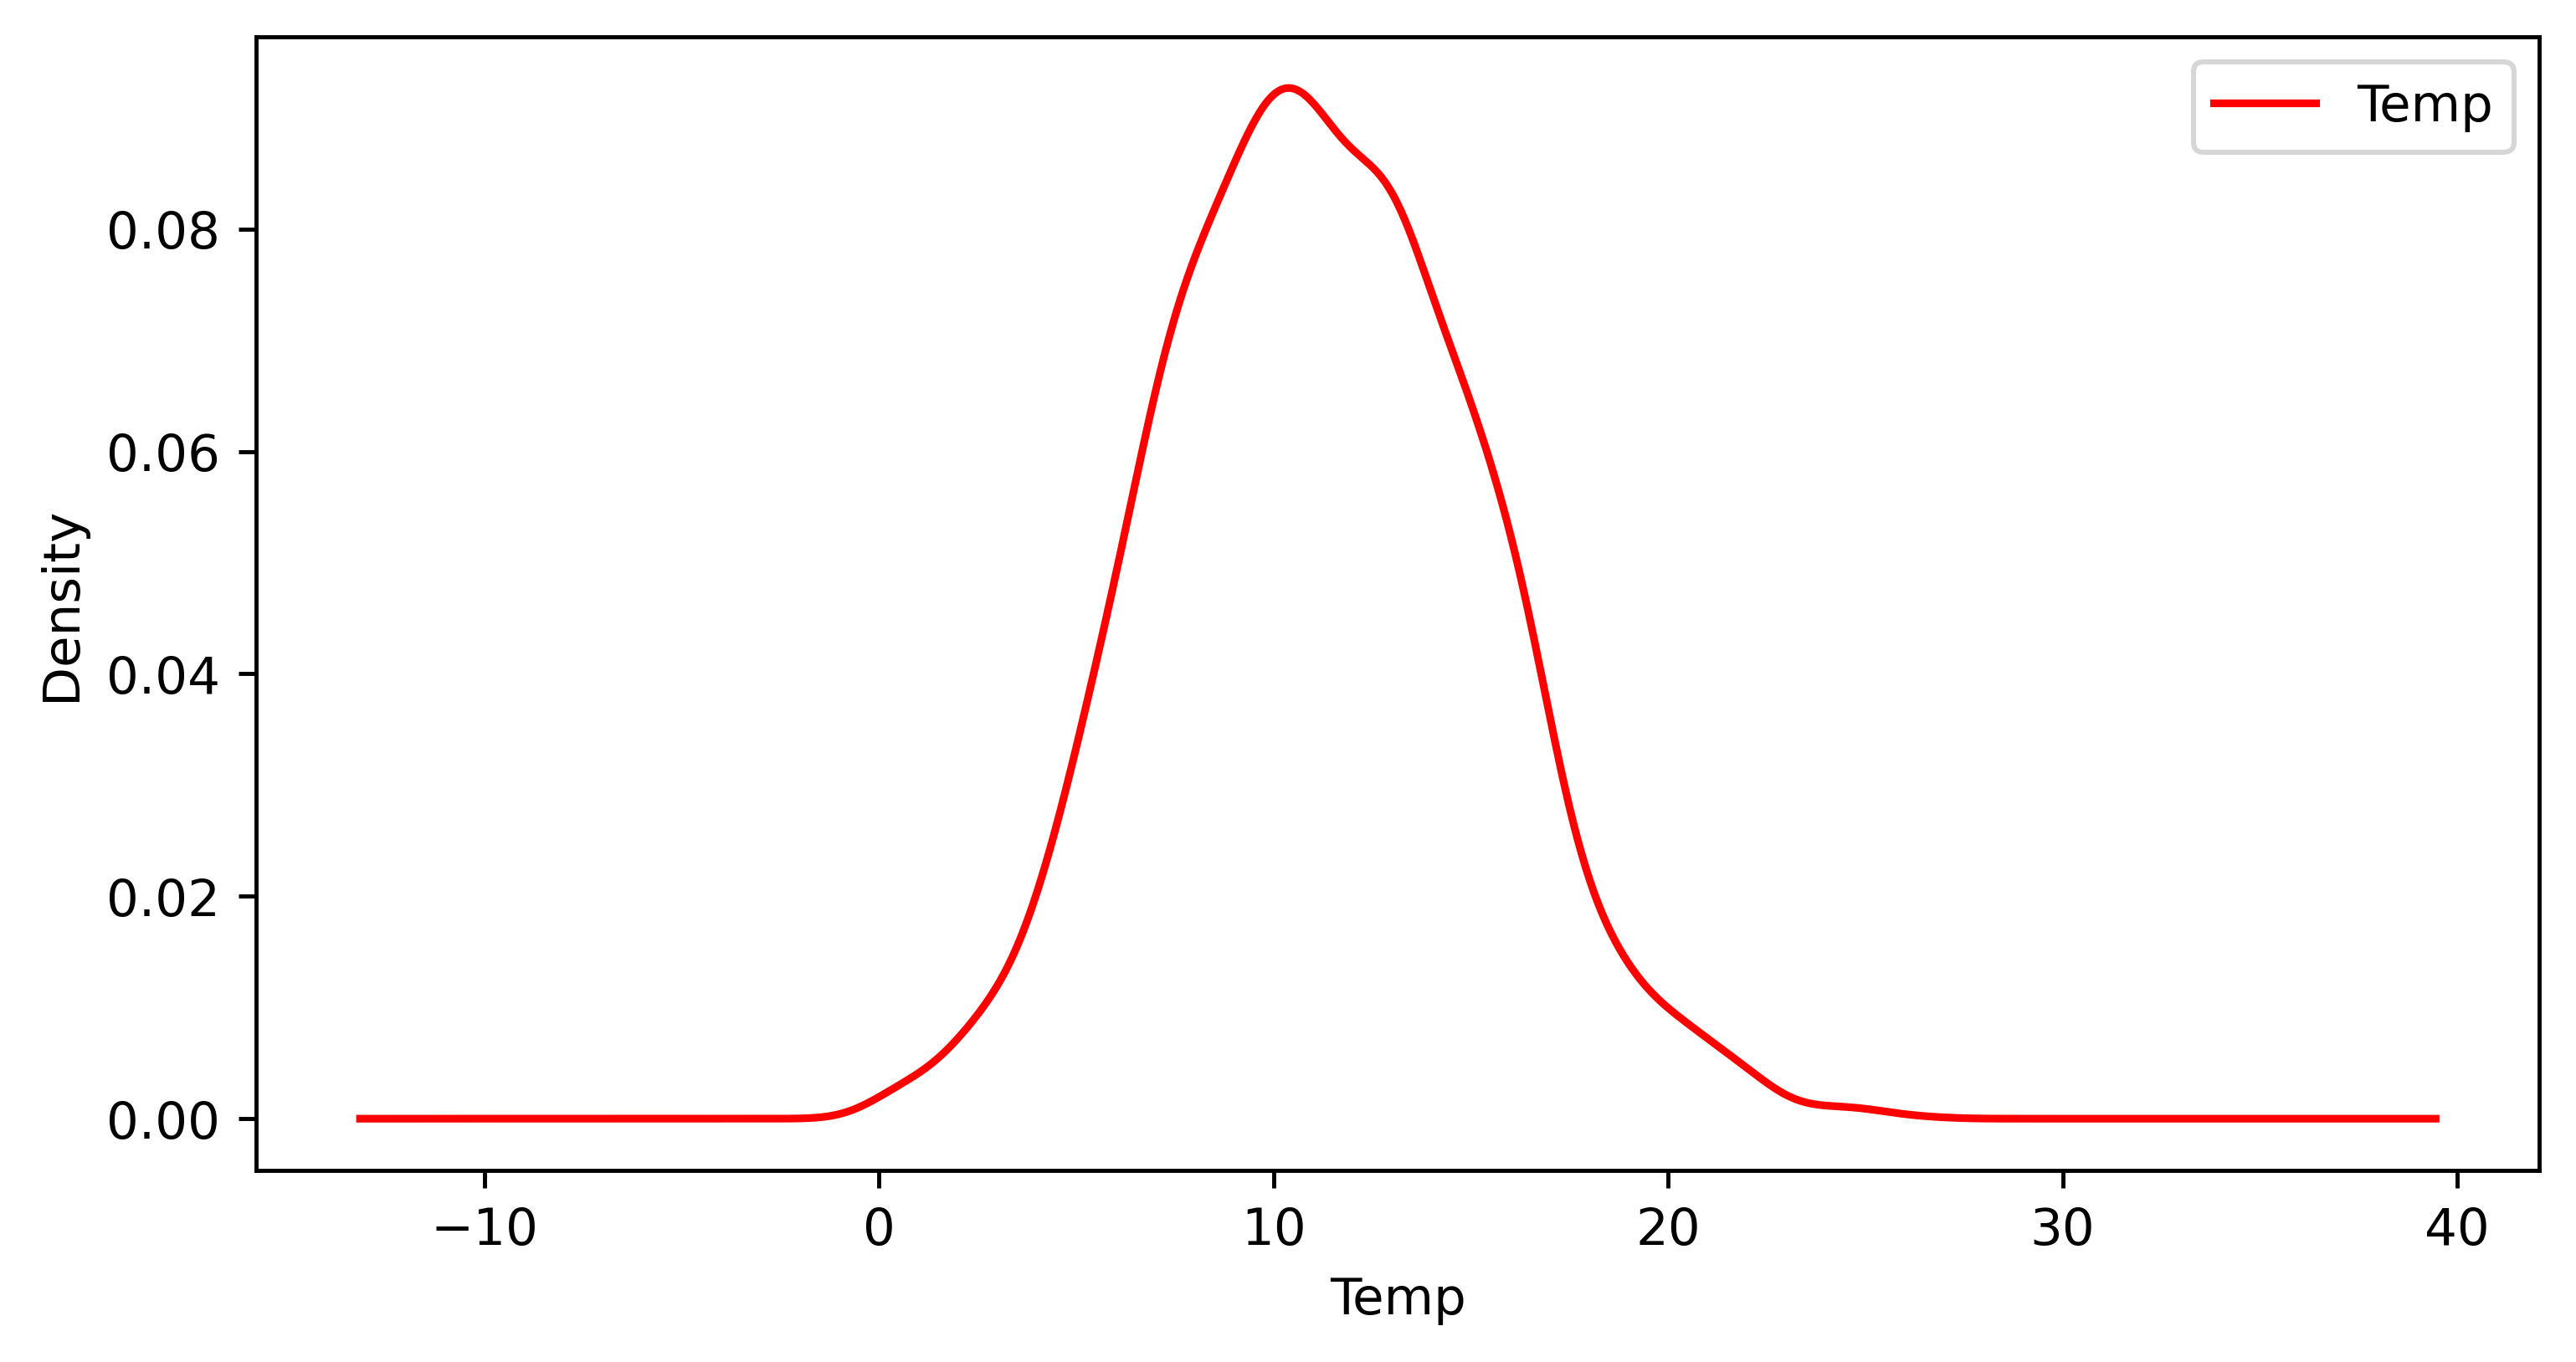

<Figure size 3520x1760 with 0 Axes>

In [65]:
df.plot(kind = 'kde', color = 'red')
plt.xlabel('Temp')
plt.show()
plt.savefig('timeseries4_2.jpg')